In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('balances.csv')
df2 = pd.read_csv('transactions_pop.csv')
df = df.merge(df2[['user', 'ammount_of_transactions']], left_on='username', right_on='user', how='left')


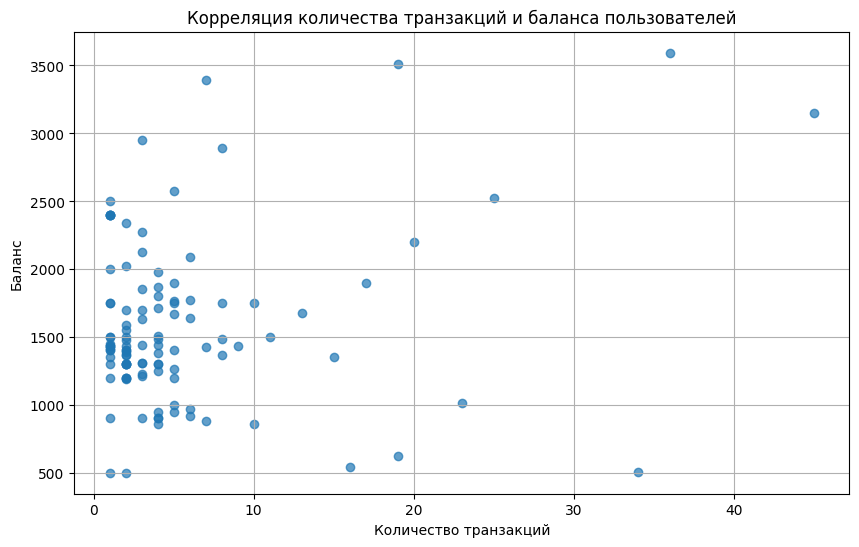

In [24]:
# Filter rows where userrights is 'child'
child_users = df[df['userrights'] == 'child']

plt.figure(figsize=(10, 6))

plt.scatter(child_users['ammount_of_transactions'], child_users['balance'], alpha=0.7)

plt.title('Корреляция количества транзакций и баланса пользователей')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.grid(True)

Коэффициент корреляции R = 0.252


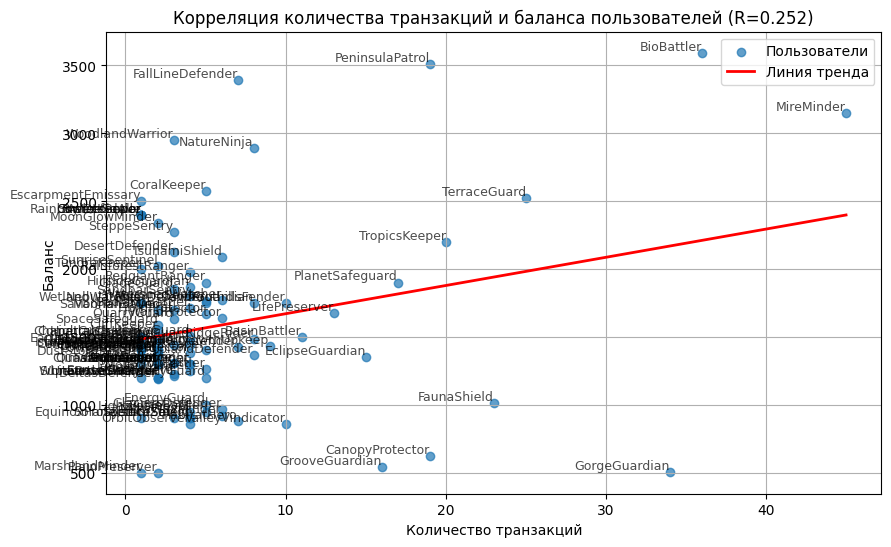

In [ ]:
import numpy as np

df_clean = child_users.dropna(subset=['ammount_of_transactions', 'balance', 'user'])
x = df_clean['ammount_of_transactions']
y = df_clean['balance']
labels = df_clean['user']

# Считаем коэффициент корреляции и параметры линии тренда
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Коэффициент корреляции R = {r_value:.3f}")

# Построение графика
plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.7, label='Пользователи')
# Линия тренда
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия тренда')

# Подписи для каждой точки
for xi, yi, label in zip(x, y, labels):
    plt.text(xi, yi, str(label), fontsize=9, ha='right', va='bottom', alpha=0.7)

plt.title(f'Корреляция количества транзакций и баланса пользователей (R={r_value:.3f})')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.legend()
plt.grid(True)


plt.show()


Коэффициент корреляции R = 0.252


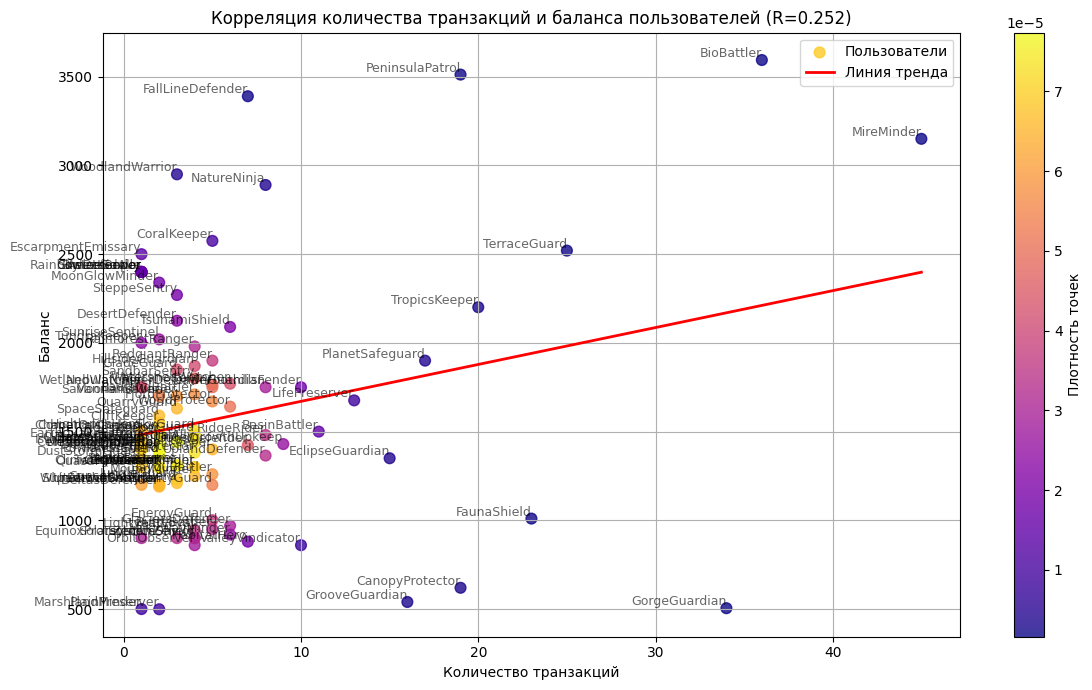

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, gaussian_kde

df_clean = child_users.dropna(subset=['ammount_of_transactions', 'balance', 'user'])
x = df_clean['ammount_of_transactions']
y = df_clean['balance']
labels = df_clean['user']

# Считаем коэффициент корреляции и параметры линии тренда
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"Коэффициент корреляции R = {r_value:.3f}")

# Вычисляем плотность для каждой точки
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)

# Построение графика
plt.figure(figsize=(12, 7))

sc = plt.scatter(x, y, c=density, cmap='plasma', s=60, alpha=0.8, label='Пользователи')
plt.colorbar(sc, label='Плотность точек')

# Линия тренда
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия тренда')

# Подписи для каждой точки
for xi, yi, label in zip(x, y, labels):
    plt.text(xi, yi, str(label), fontsize=9, ha='right', va='bottom', alpha=0.6)

plt.title(f'Корреляция количества транзакций и баланса пользователей (R={r_value:.3f})')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Коэффициент корреляции R = 0.252


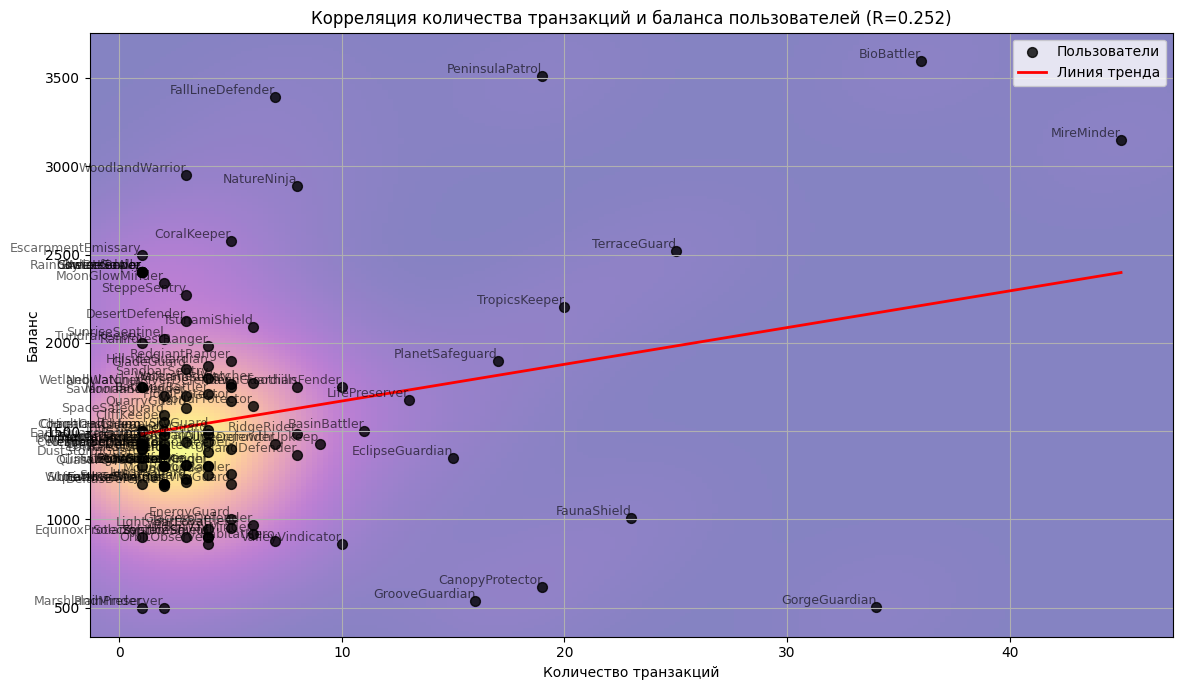

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, gaussian_kde

df_clean = child_users.dropna(subset=['ammount_of_transactions', 'balance', 'user'])
x = df_clean['ammount_of_transactions'].values
y = df_clean['balance'].values
labels = df_clean['user'].values

# Считаем коэффициент корреляции и параметры линии тренда
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Коэффициент корреляции R = {r_value:.3f}")

# Оценка плотности на сетке для фона
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Создаем сетку с правильным охватом данных
x_grid = np.linspace(x.min() - (x.max()-x.min())*0.05, x.max() + (x.max()-x.min())*0.05, 200)
y_grid = np.linspace(y.min() - (y.max()-y.min())*0.05, y.max() + (y.max()-y.min())*0.05, 200)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

plt.figure(figsize=(12, 7))

# Рисуем фон через pcolormesh для правильной привязки к координатам
plt.pcolormesh(X, Y, Z, shading='auto', cmap='plasma', alpha=0.5)

# Рисуем scatter поверх
plt.scatter(x, y, color='black', s=50, alpha=0.8, label='Пользователи')

# Линия тренда
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия тренда')

# Подписи для каждой точки
for xi, yi, label in zip(x, y, labels):
    plt.text(xi, yi, str(label), fontsize=9, ha='right', va='bottom', alpha=0.6)

plt.title(f'Корреляция количества транзакций и баланса пользователей (R={r_value:.3f})')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Коэффициент корреляции R = 0.252


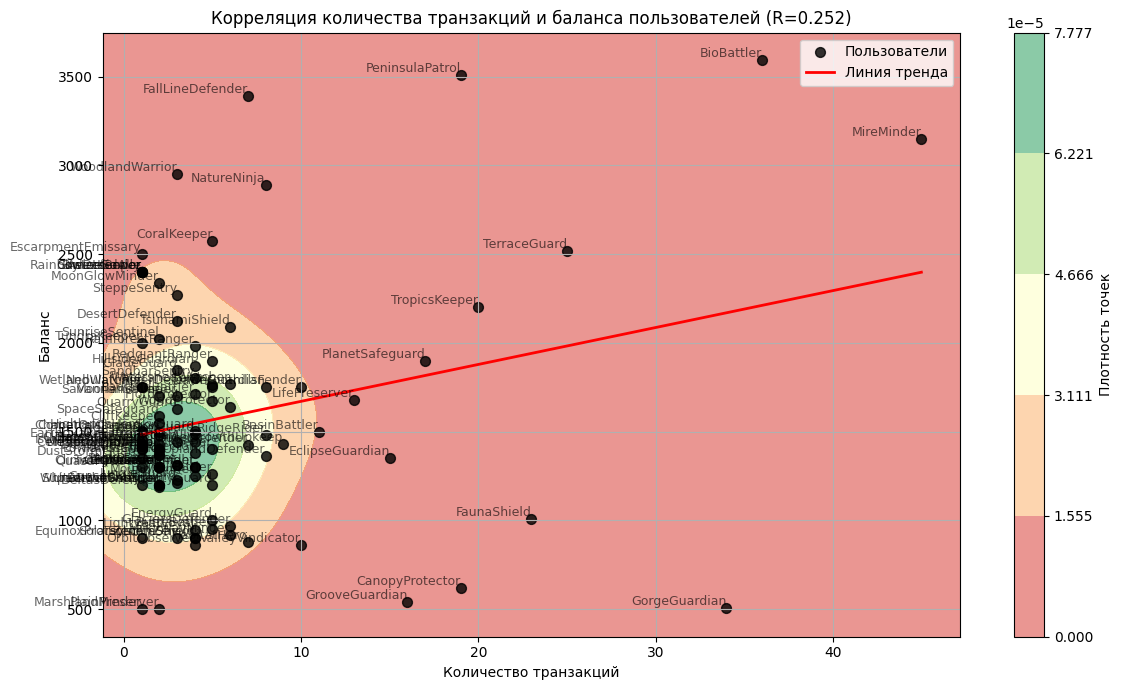

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, gaussian_kde

df_clean = child_users.dropna(subset=['ammount_of_transactions', 'balance', 'user'])
x = df_clean['ammount_of_transactions'].values
y = df_clean['balance'].values
labels = df_clean['user'].values

# Считаем коэффициент корреляции и параметры линии тренда
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Коэффициент корреляции R = {r_value:.3f}")

# Оценка плотности на сетке для фона
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Сетка для оценки плотности
x_grid = np.linspace(x.min() - (x.max()-x.min())*0.05, x.max() + (x.max()-x.min())*0.05, 200)
y_grid = np.linspace(y.min() - (y.max()-y.min())*0.05, y.max() + (y.max()-y.min())*0.05, 200)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

plt.figure(figsize=(12, 7))

# Чёткие границы с помощью контуров
levels = np.linspace(Z.min(), Z.max(), 6)
contour = plt.contourf(X, Y, Z, levels=levels, cmap='RdYlGn', alpha=0.5)

plt.colorbar(contour, label='Плотность точек')
# Scatter поверх
plt.scatter(x, y, color='black', s=50, alpha=0.8, label='Пользователи')

# Линия тренда
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия тренда')

# Подписи для каждой точки
for xi, yi, label in zip(x, y, labels):
    plt.text(xi, yi, str(label), fontsize=9, ha='right', va='bottom', alpha=0.6)

plt.title(f'Корреляция количества транзакций и баланса пользователей (R={r_value:.3f})')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Коэффициент корреляции R = 0.252


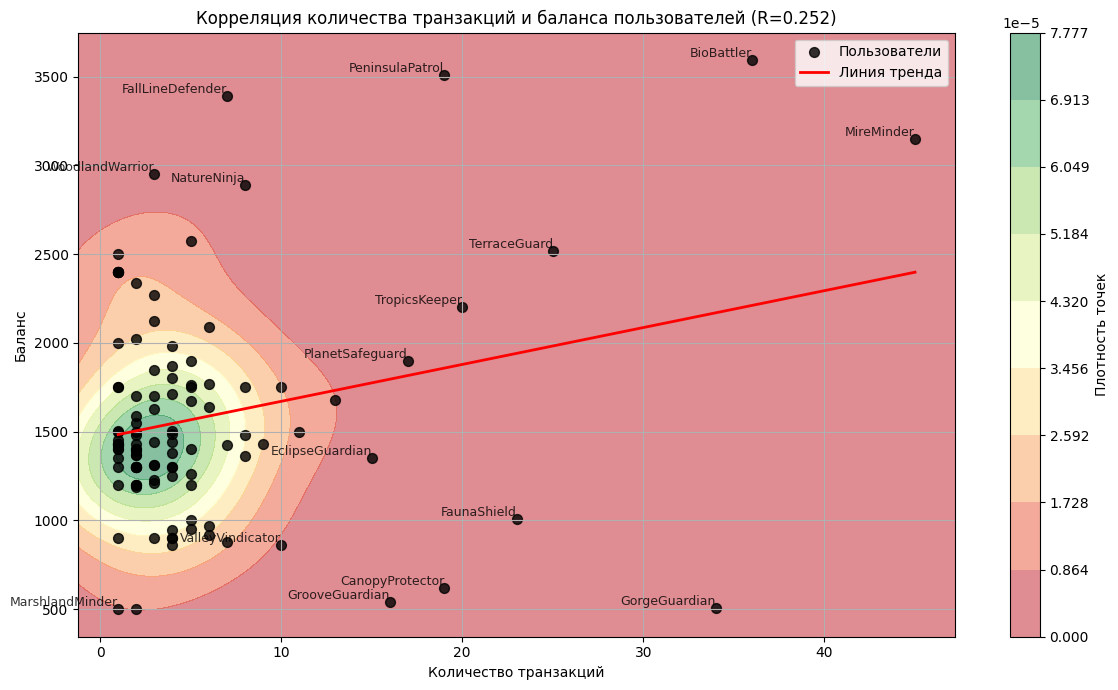

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, gaussian_kde

df_clean = child_users.dropna(subset=['ammount_of_transactions', 'balance', 'user'])
x = df_clean['ammount_of_transactions'].values
y = df_clean['balance'].values
labels = df_clean['user'].values

# Считаем коэффициент корреляции и параметры линии тренда
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Коэффициент корреляции R = {r_value:.3f}")

# Оценка плотности на сетке для фона
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Сетка для оценки плотности
x_grid = np.linspace(x.min() - (x.max()-x.min())*0.05, x.max() + (x.max()-x.min())*0.05, 200)
y_grid = np.linspace(y.min() - (y.max()-y.min())*0.05, y.max() + (y.max()-y.min())*0.05, 200)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = kde(positions).reshape(X.shape)

plt.figure(figsize=(12, 7))

# Чёткие границы с помощью контуров
levels = np.linspace(Z.min(), Z.max(), 10)  # 5 интервалов + 1 крайняя граница
contour = plt.contourf(X, Y, Z, levels=levels, cmap='RdYlGn', alpha=0.5)
plt.colorbar(contour, label='Плотность точек')

# Scatter поверх
plt.scatter(x, y, color='black', s=50, alpha=0.8, label='Пользователи')

# Линия тренда
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label='Линия тренда')

# Вычисляем плотность в самих точках
point_densities = kde(np.vstack([x, y]))

# Порог для подписей — нижний уровень контура
threshold = levels[1]  # levels[0] — min, levels[1] — граница самой крайней зоны

# Подписи только для точек с плотностью <= threshold
for xi, yi, label, density in zip(x, y, labels, point_densities):
    if density <= threshold:
        plt.text(xi, yi, str(label), fontsize=9, ha='right', va='bottom', alpha=0.8)

plt.title(f'Корреляция количества транзакций и баланса пользователей (R={r_value:.3f})')
plt.xlabel('Количество транзакций')
plt.ylabel('Баланс')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


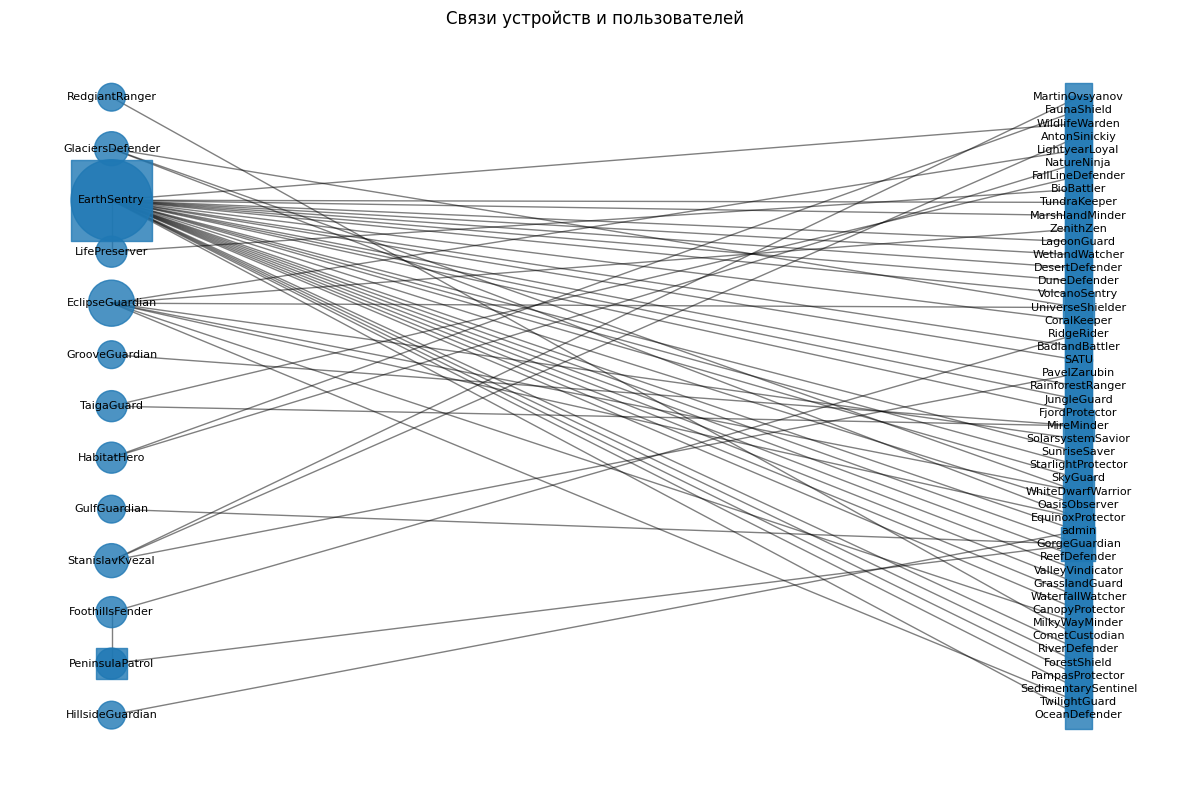

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка данных из CSV
df = pd.read_csv('strange_logins.csv', usecols=['cookie', 'username'])

# Строим бипартитный граф
B = nx.Graph()

# Добавляем узлы двух типов
devices = df['cookie'].unique()
users = df['username'].unique()

B.add_nodes_from(devices, bipartite=0)  # устройства
B.add_nodes_from(users, bipartite=1)    # пользователи

# Добавляем ребра device <-> user
edges = list(df.drop_duplicates().itertuples(index=False, name=None))
B.add_edges_from(edges)

# Вычисляем позиционирование
pos = dict()
# Используем bipartite_layout: устройства слева, пользователи справа
pos.update(nx.bipartite_layout(B, devices))

# Размер узла пропорционален числу связей
node_sizes = [300 + 100 * B.degree(n) for n in B.nodes()]

# Рисуем граф
plt.figure(figsize=(12, 8))
# Устройства: окружности
nx.draw_networkx_nodes(
    B, pos,
    nodelist=devices,
    node_shape='o',
    node_size=[node_sizes[list(B.nodes()).index(d)] for d in devices],
    alpha=0.8
)
# Пользователи: квадраты
nx.draw_networkx_nodes(
    B, pos,
    nodelist=users,
    node_shape='s',
    node_size=[node_sizes[list(B.nodes()).index(u)] for u in users],
    alpha=0.8
)
# Рёбра
nx.draw_networkx_edges(B, pos, alpha=0.5)

# Подписи узлов
nx.draw_networkx_labels(B, pos, font_size=8)

plt.title('Связи устройств и пользователей')
plt.axis('off')
plt.tight_layout()
plt.show()


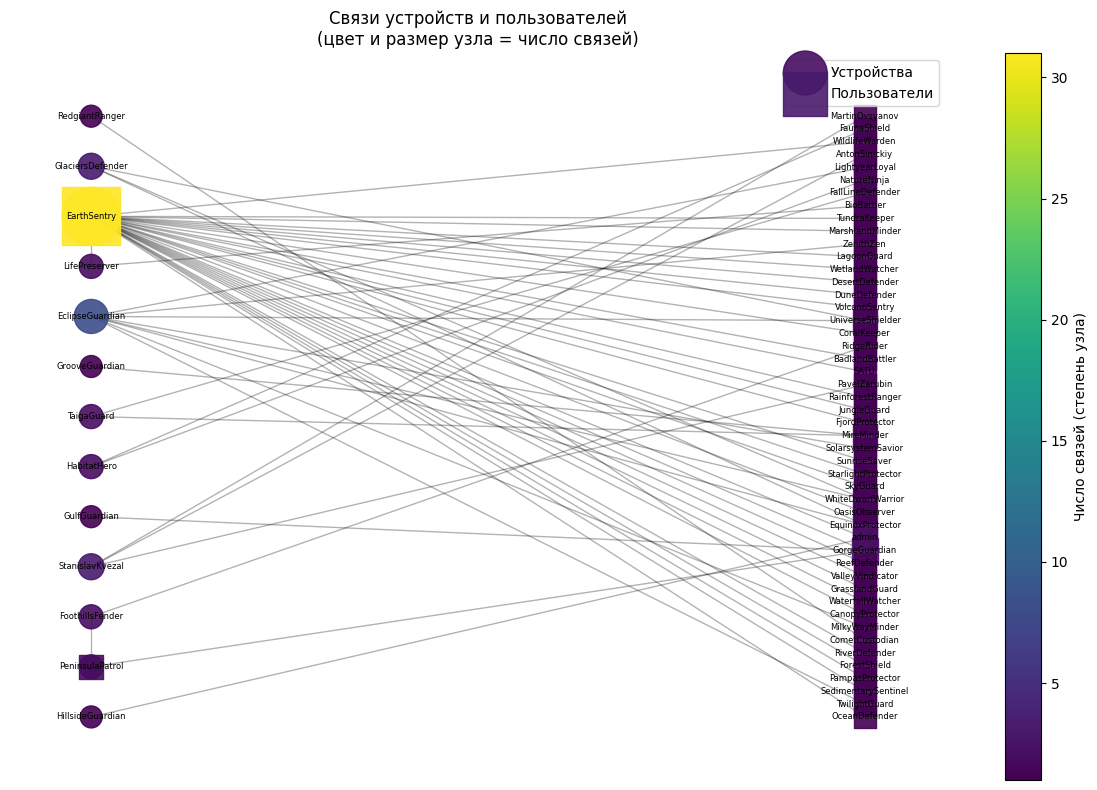

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

# Загрузка данных из CSV
df = pd.read_csv('strange_logins.csv', usecols=['cookie', 'username'])

# Построение бипартитного графа
B = nx.Graph()
devices = df['cookie'].unique()
users = df['username'].unique()
B.add_nodes_from(devices, bipartite=0)
B.add_nodes_from(users, bipartite=1)
edges = list(df.drop_duplicates().itertuples(index=False, name=None))
B.add_edges_from(edges)

# Позиционирование узлов
pos = nx.bipartite_layout(B, devices)

# Вычисление степеней (число связей)
degrees = dict(B.degree())
deg_values = list(degrees.values())
vmin, vmax = min(deg_values), max(deg_values)

# Подготовка цветовой карты по степеням
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Настройка фигуры
fig, ax = plt.subplots(figsize=(12, 8))

# Рисуем рёбра
nx.draw_networkx_edges(B, pos, alpha=0.3, ax=ax)

# Рисуем устройства (круги)
device_colors = [cmap(norm(degrees[n])) for n in devices]
device_sizes = [200 + 50 * degrees[n] for n in devices]
scatter_dev = ax.scatter(
    [pos[n][0] for n in devices],
    [pos[n][1] for n in devices],
    s=device_sizes,
    c=device_colors,
    marker='o',
    label='Устройства',
    alpha=0.9
)

# Рисуем пользователей (квадраты)
user_colors = [cmap(norm(degrees[n])) for n in users]
user_sizes = [200 + 50 * degrees[n] for n in users]
scatter_usr = ax.scatter(
    [pos[n][0] for n in users],
    [pos[n][1] for n in users],
    s=user_sizes,
    c=user_colors,
    marker='s',
    label='Пользователи',
    alpha=0.9
)

# Подписи узлов (уменьшенный размер шрифта)
for node, (x, y) in pos.items():
    ax.text(x, y, node, fontsize=6, horizontalalignment='center', verticalalignment='center')

# Легенда для форм узлов
ax.legend(scatterpoints=1, frameon=True)

# Цветовая шкала (colorbar) для степеней
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Число связей (степень узла)')

ax.set_title('Связи устройств и пользователей\n(цвет и размер узла = число связей)')
ax.axis('off')
plt.tight_layout()
plt.show()
